# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url +"appid="+ weather_api_key +"&q="+ city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()
        #print(weather_json)
        city_weather =  weather_json['weather'][0]['description']
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date =  weather_json['dt']

         #Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
             
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | lebork
Processing Record 3 of Set 1 | kodinsk
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | tailai
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | higuera de zaragoza
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | viedma
Processing Record 13 of Set 1 | kuta
Processing Record 14 of Set 1 | macapa
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | vernon
Processing Record 17 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | remire-montjoly
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | novodvinsk
Processing Record 22 of Set 1 |

Processing Record 37 of Set 4 | longyearbyen
Processing Record 38 of Set 4 | plettenberg bay
Processing Record 39 of Set 4 | hovd
Processing Record 40 of Set 4 | mount pearl
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | east london
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | holualoa
Processing Record 45 of Set 4 | al kharijah
Processing Record 46 of Set 4 | tsiombe
Processing Record 47 of Set 4 | cooma
Processing Record 48 of Set 4 | queenstown
Processing Record 49 of Set 4 | kavieng
Processing Record 0 of Set 5 | west bay
Processing Record 1 of Set 5 | plast
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | keflavik
Processing Record 4 of Set 5 | kermanshah
Processing Record 5 of Set 5 | an nusayrat
Processing Record 6 of Set 5 | whakatane
Processing Record 7 of Set 5 | severo-yeniseyskiy
Processing Record 8 of Set 5 | bogotol
Processing Record 9 of Set 5 | rutland
Processing Record 10 of Set 5 | sarangani
Pr

Processing Record 30 of Set 8 | fort bragg
Processing Record 31 of Set 8 | galesong
Processing Record 32 of Set 8 | gwadar
Processing Record 33 of Set 8 | perry
Processing Record 34 of Set 8 | illizi
Processing Record 35 of Set 8 | ngama
Processing Record 36 of Set 8 | cacheu
Processing Record 37 of Set 8 | augusto correa
Processing Record 38 of Set 8 | pisco
Processing Record 39 of Set 8 | punta del este
Processing Record 40 of Set 8 | kununurra
Processing Record 41 of Set 8 | jarna
Processing Record 42 of Set 8 | fort wayne
Processing Record 43 of Set 8 | nadi
Processing Record 44 of Set 8 | tshabong
Processing Record 45 of Set 8 | salinas
Processing Record 46 of Set 8 | bikenibeu village
Processing Record 47 of Set 8 | sao felix do xingu
Processing Record 48 of Set 8 | touros
Processing Record 49 of Set 8 | tazacorte
Processing Record 0 of Set 9 | vorkuta
Processing Record 1 of Set 9 | yuzhno-kurilsk
Processing Record 2 of Set 9 | ta`u
Processing Record 3 of Set 9 | pico truncado
Pr

Processing Record 16 of Set 12 | mil'kovo
Processing Record 17 of Set 12 | glace bay
Processing Record 18 of Set 12 | ribadesella
Processing Record 19 of Set 12 | gracemere
Processing Record 20 of Set 12 | rodolfo sanchez taboada
Processing Record 21 of Set 12 | ujae
Processing Record 22 of Set 12 | rome
Processing Record 23 of Set 12 | usinsk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,288.05,88,100,2.24,NZ,1704219640
1,lebork,54.5392,17.7501,276.19,96,100,4.66,PL,1704219640
2,kodinsk,58.6881,99.1844,262.28,96,100,1.95,RU,1704219640
3,ushuaia,-54.8000,-68.3000,287.96,38,40,7.72,AR,1704219424
4,port-aux-francais,-49.3500,70.2167,278.22,85,94,17.80,TF,1704219641


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df['Max Temp']= city_data_df['Max Temp']-273.15
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.90,88,100,2.24,NZ,1704219640
1,lebork,54.5392,17.7501,3.04,96,100,4.66,PL,1704219640
2,kodinsk,58.6881,99.1844,-10.87,96,100,1.95,RU,1704219640
3,ushuaia,-54.8000,-68.3000,14.81,38,40,7.72,AR,1704219424
4,port-aux-francais,-49.3500,70.2167,5.07,85,94,17.80,TF,1704219641


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

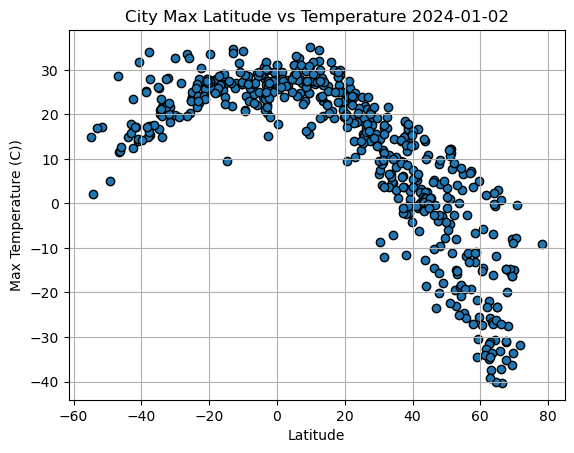

In [8]:
# Build scatter plot for latitude vs. temperature
date= datetime.date(datetime.now())
date
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker="o",edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C))")
plt.title(f"City Max Latitude vs Temperature {date}")

#NEED TO CONVERT THE TEMPERATURES TO CELSIUS************* AND ADD THE TIME DATE FORMAT**********
# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

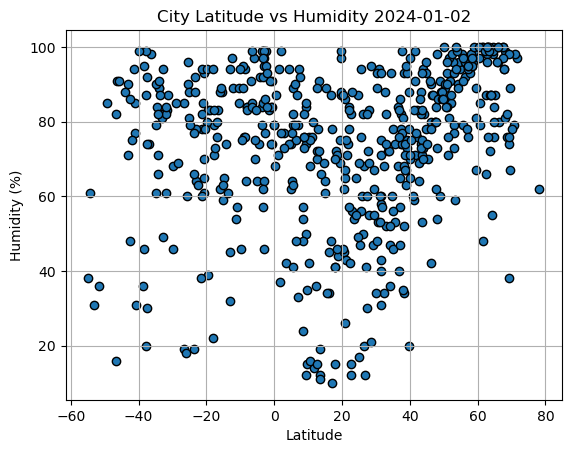

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker="o",edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {date}")

# Incorporate the other graph properties****
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

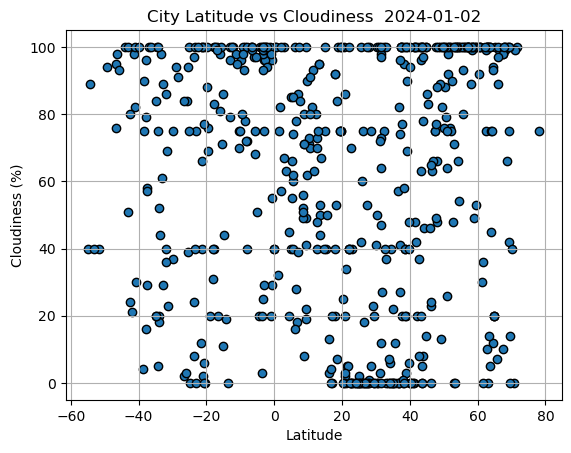

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker="o",edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness  {date}")



# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

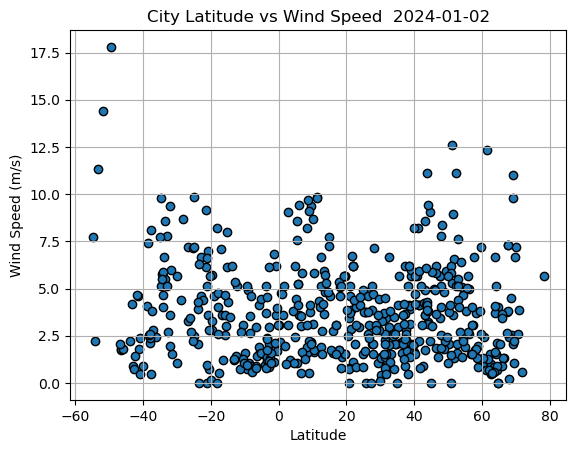

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker="o",edgecolors ="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed  {date}")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_function(x_column, y_column, title ="",x_label ="",y_label="",coordinate1=0,coordinate2=0):

    plt.scatter(x_column,y_column)
    x =x_column
    y= y_column
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.annotate(line_eq,(coordinate1,coordinate2),fontsize=15,color="red")
    print(f" The r-squared is : {rvalue**2}")
    correlation = st.pearsonr(x,y)
    print(f"The Correlation between both factors is {round(correlation[0],2)}")
    m,b =np.polyfit(x,y,1)
    return plt.plot(x,m*x+b,color="red")
    plt.plot(x,regress_values,"r-")
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lebork,54.5392,17.7501,3.04,96,100,4.66,PL,1704219640
2,kodinsk,58.6881,99.1844,-10.87,96,100,1.95,RU,1704219640
5,tailai,46.3833,123.4000,-14.49,90,23,1.83,CN,1704219641
6,thompson,55.7435,-97.8558,-11.91,79,100,5.66,CA,1704219641
8,higuera de zaragoza,25.9500,-109.2833,21.96,60,60,4.82,MX,1704219641


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.90,88,100,2.24,NZ,1704219640
3,ushuaia,-54.8000,-68.3000,14.81,38,40,7.72,AR,1704219424
4,port-aux-francais,-49.3500,70.2167,5.07,85,94,17.80,TF,1704219641
7,afaahiti,-17.7500,-149.2833,24.93,79,100,4.00,PF,1704219641
10,puerto ayora,-0.7393,-90.3518,25.86,91,29,3.58,EC,1704219642


###  Temperature vs. Latitude Linear Regression Plot

 The r-squared is : 0.7600942741340989
The Correlation between both factors is -0.87


1

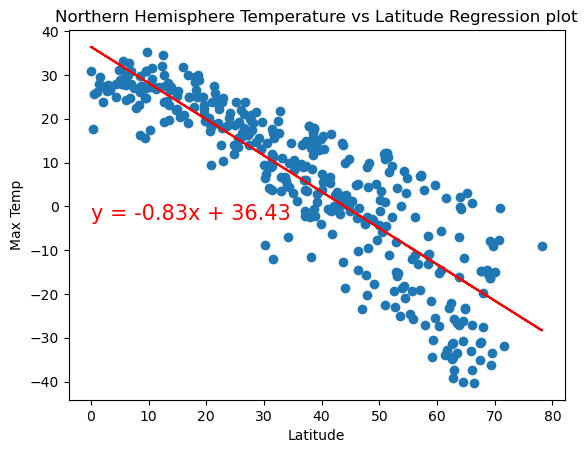

In [15]:
# Linear regression on Northern Hemisphere
linear_regression_function(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],
                           "Northern Hemisphere Temperature vs Latitude Regression plot","Latitude","Max Temp",0,-3)
1


 The r-squared is : 0.3138420660687994
The Correlation between both factors is 0.56


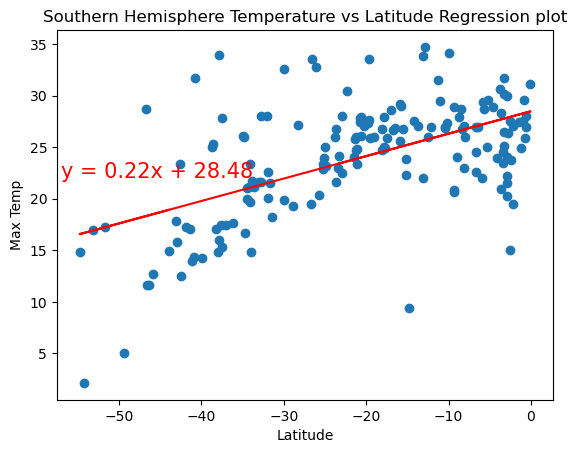

In [16]:
# Linear regression on Southern Hemisphere
linear_regression_function(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],
                           "Southern Hemisphere Temperature vs Latitude Regression plot","Latitude","Max Temp",-57,22)



#### **Discussion about the linear relationship:** 
The Northern hemisphere has a negative linear relationship because as the temperature decreases the latitude increases while the Southern hemisphere has a positive relationship i.e. as the temperature increases the latitude increases

### Humidity vs. Latitude Linear Regression Plot

 The r-squared is : 0.20407607147361498
The Correlation between both factors is 0.45


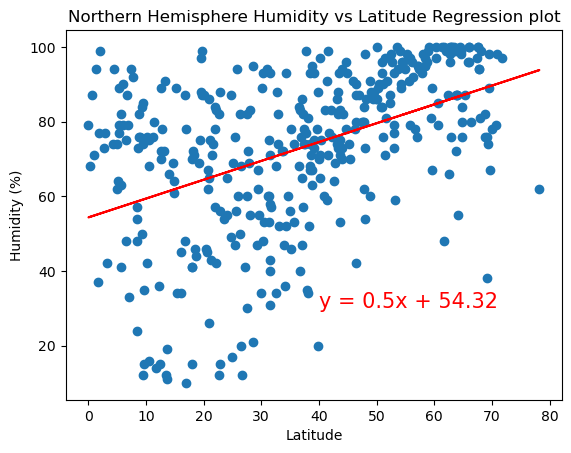

In [17]:
# Northern Hemisphere
linear_regression_function(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],
                           "Northern Hemisphere Humidity vs Latitude Regression plot","Latitude","Humidity (%)",40,30)

 The r-squared is : 0.058332318860717804
The Correlation between both factors is 0.24


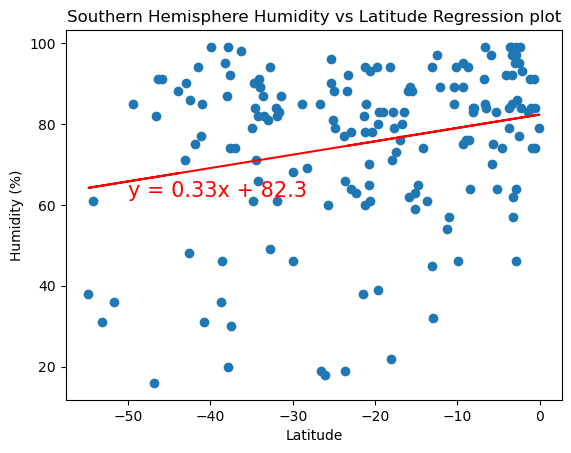

In [28]:
# Southern Hemisphere
linear_regression_function(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],
                           "Southern Hemisphere Humidity vs Latitude Regression plot","Latitude","Humidity (%)",-50,62)

**Discussion about the linear relationship:** In the northern hemisphere there is a slight positive relationship between the humidity and latitude while in the sourthern hemisphere there is a weak correlation between humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

 The r-squared is : 0.045466669310205925
The Correlation between both factors is 0.21


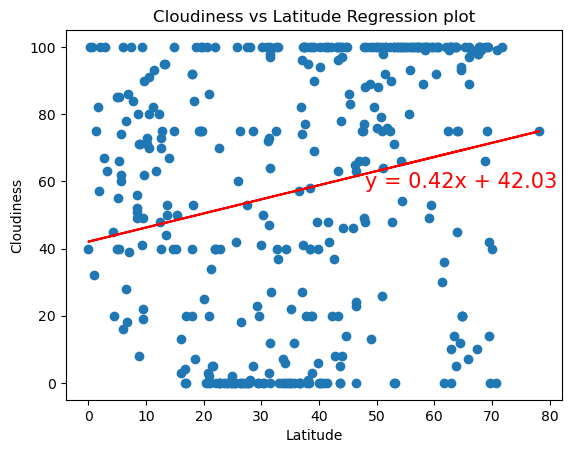

In [19]:
# Northern Hemisphere
linear_regression_function(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],
                           "Cloudiness vs Latitude Regression plot","Latitude","Cloudiness",48,58)

 The r-squared is : 0.058332318860717804
The Correlation between both factors is 0.24


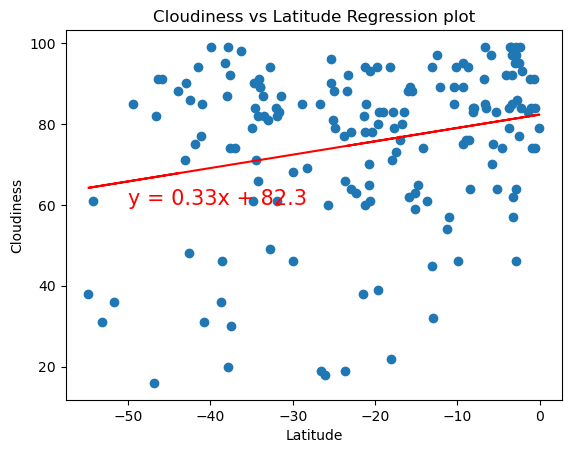

In [20]:
# Southern Hemisphere
linear_regression_function(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],
                           "Cloudiness vs Latitude Regression plot","Latitude","Cloudiness",-50,60)

**Discussion about the linear relationship:** In the northern hemisphere there is a slight positive relationship between the cloudiness and latitude while in the sourthern hemisphere there is a weak correlation between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

 The r-squared is : 0.004853906615862336
The Correlation between both factors is -0.07


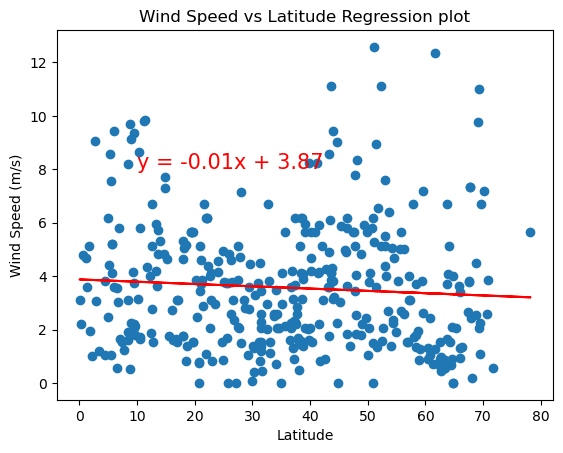

In [21]:
# Northern Hemisphere
linear_regression_function(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],
                           "Wind Speed vs Latitude Regression plot","Latitude","Wind Speed (m/s)",10,8)

 The r-squared is : 0.10814227821970906
The Correlation between both factors is -0.33


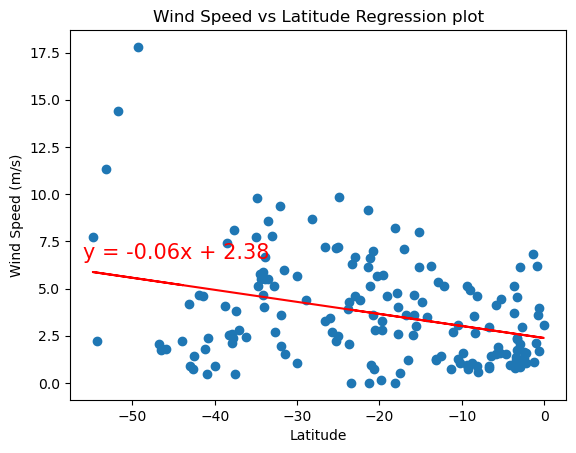

In [22]:
# Southern Hemisphere
linear_regression_function(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],
                           "Wind Speed vs Latitude Regression plot","Latitude","Wind Speed (m/s)",-56,6.6)

**Discussion about the linear relationship:** In the northern hemisphere there is a weak correlation between Wind speed and latitude while in the sourthern hemisphere there is a negative relationship i.e. as the wind speeds decrease the latitude increases